In [3]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import glob

In [4]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)

In [5]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

In [6]:
images = glob.glob('calibration_images/*.jpg')

In [7]:
gscale_global = None # dirty way of storing an image to get size later, will change (or not idk)
points_detected_global = None # to plot later (is ugly and will change later)
for image in images:
    curr_image = cv2.imread(image)
    curr_gscale = cv2.cvtColor(curr_image, cv2.COLOR_BGR2GRAY)
    gscale_global = curr_gscale
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(curr_gscale, (8,6), None)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(curr_gscale, corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        cv2.drawChessboardCorners(curr_image, (8,6), corners2, ret)
        points_detected_global = curr_image
        # cv2.imshow('img', curr_image)
        # cv2.waitKey(0)

# cv2.destroyAllWindows()

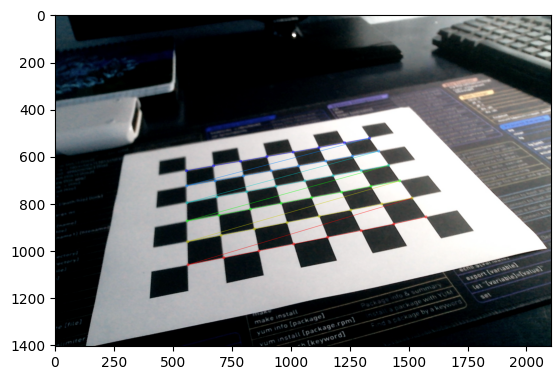

In [8]:
plt.imshow(points_detected_global)

In [9]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gscale_global.shape[::-1], None, None)


In [10]:
img = cv2.imread('calibration_images/Photo on 2-27-24 at 11.20 PM.jpg')
h,  w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

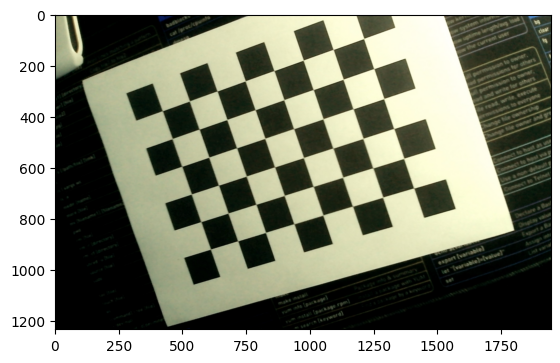

In [11]:
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
plt.imshow(dst)


In [12]:
mtx

array([[1.95512688e+03, 0.00000000e+00, 9.99979082e+02],
       [0.00000000e+00, 1.96894291e+03, 7.03714819e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [13]:
dist

array([[ 4.72407187e-02, -1.36893947e+00, -4.76959240e-03,
        -1.47285896e-03,  5.14402650e+00]])

In [14]:
np.savez('calibration', intrinsics=mtx, dist_coeffs=dist)